In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from math import sqrt, pi
import matplotlib

# Lab 1- Adder Circuit

In [2]:
qc_output = QuantumCircuit(4)

In [3]:
qc_output.draw(initial_state=True) 

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>

In [4]:
qc_output.measure_all()

In [5]:
qc_output.draw(initial_state=True) 

░ ┌─┐         
  q_0: |0>─░─┤M├─────────
           ░ └╥┘┌─┐      
  q_1: |0>─░──╫─┤M├──────
           ░  ║ └╥┘┌─┐   
  q_2: |0>─░──╫──╫─┤M├───
           ░  ║  ║ └╥┘┌─┐
  q_3: |0>─░──╫──╫──╫─┤M├
           ░  ║  ║  ║ └╥┘
meas: 0 4/════╩══╩══╩══╩═
              0  1  2  3

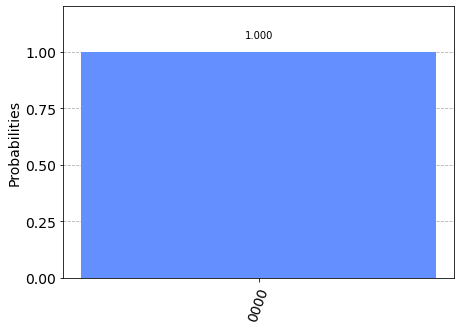

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
number = QuantumCircuit(6,3)
# first number
number.x(0)
number.x(1)
# second number
number.x(2)
number.x(3)
number.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────
          
q_5: ─────
          
c: 3/═════

In [8]:
number.ccx(0,2,4)
number.cx(0,2)
number.barrier()

number.cx(1,3)
number.ccx(3,4,5)
number.cx(5,3)
number.barrier()

number.measure(2,0)
number.measure(3,1)
number.measure(4,2)

In [9]:
number.draw(initial_state=True)

┌───┐           ░                 ░          
q_0: |0>┤ X ├──■────■───░─────────────────░──────────
        ├───┤  │    │   ░                 ░          
q_1: |0>┤ X ├──┼────┼───░───■─────────────░──────────
        ├───┤  │  ┌─┴─┐ ░   │             ░ ┌─┐      
q_2: |0>┤ X ├──■──┤ X ├─░───┼─────────────░─┤M├──────
        ├───┤  │  └───┘ ░ ┌─┴─┐     ┌───┐ ░ └╥┘┌─┐   
q_3: |0>┤ X ├──┼────────░─┤ X ├──■──┤ X ├─░──╫─┤M├───
        └───┘┌─┴─┐      ░ └───┘  │  └─┬─┘ ░  ║ └╥┘┌─┐
q_4: |0>─────┤ X ├──────░────────■────┼───░──╫──╫─┤M├
             └───┘      ░      ┌─┴─┐  │   ░  ║  ║ └╥┘
q_5: |0>────────────────░──────┤ X ├──■───░──╫──╫──╫─
                        ░      └───┘      ░  ║  ║  ║ 
 c: 0 3/═════════════════════════════════════╩══╩══╩═
                                             0  1  2

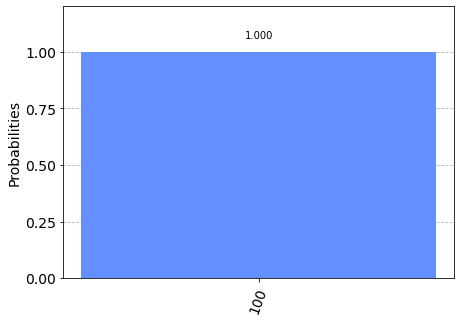

In [10]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(number).result()
counts = result.get_counts()
plot_histogram(counts)

# dosnt work properly fix it

# Lab 3

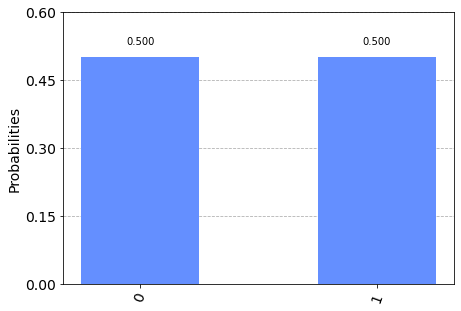

In [11]:
qc = QuantumCircuit(1)
initial_state =[1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
#print(state)
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

state of measured Qubit: Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


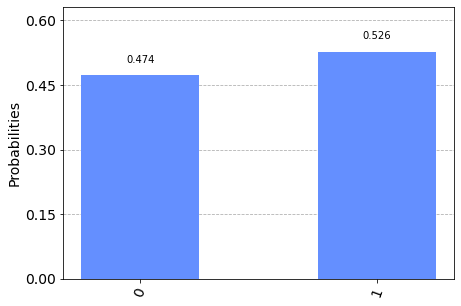

In [12]:
qc = QuantumCircuit(1)
initial_state =[1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("state of measured Qubit: "+str(state))

#print(state)
# qobj = assemble(qc)

results = sim.run(qobj).result().get_counts()
plot_histogram(results)

#every time the code is run the probabilities changes

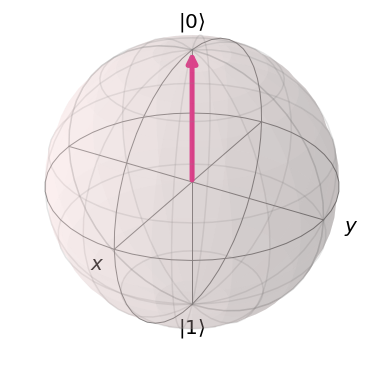

In [14]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [0,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

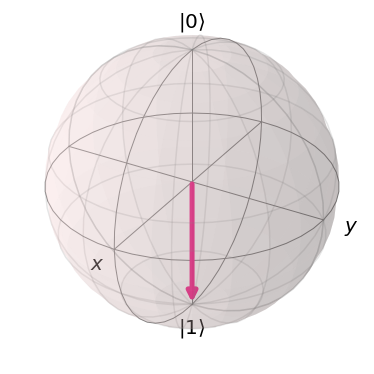

In [19]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

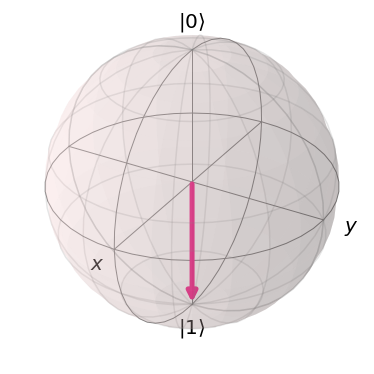

In [22]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [23]:
def convert_to_radial(a,b):
    r = sqrt(a**2+b**2)
    theta = 0
    if a>0:
        theta = math.atan(b/a)
    else:
        theta = math.atan(b/a)+pi
    return (r, theta)

# Lab 4

### Pauli gates

In [44]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

### X gate

In [50]:
qc = QuantumCircuit(2)
qc.draw()

q_0: 
     
q_1:

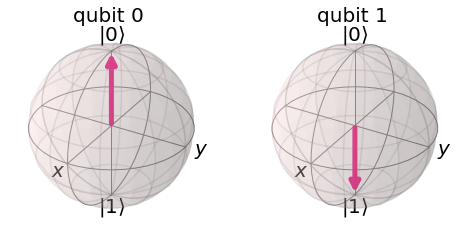

In [51]:
# applying x gate
qc.x(1)

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### Y gate


In [65]:
qc = QuantumCircuit(2)
qc.draw()

q_0: 
     
q_1:

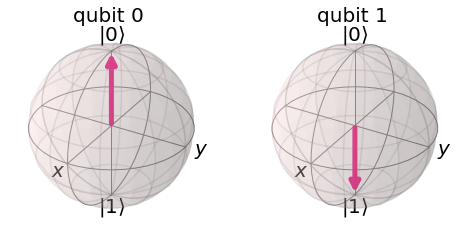

In [66]:
# applying y gate
qc.y(1)

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### Z gate

In [60]:
qc = QuantumCircuit(2)
qc.draw()

q_0: 
     
q_1:

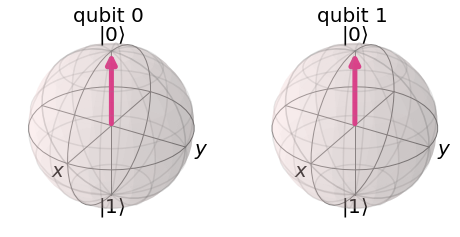

In [61]:
# z gate
qc.z(1)

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# Lab 5

In [2]:
qc = QuantumCircuit(3)
# applying H gate to each Qubit

for qubit in range(3):
    qc.h(qubit)
    
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [4]:
# H tensorProduct X
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [5]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [21]:
# H tensorProduct X
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [22]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

# Lab 6

In [9]:
qc = QuantumCircuit(2)
qc.draw()

# |00>


q_0: 
     
q_1:

In [10]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [11]:
# |01>
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [12]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [13]:
# |11>
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [14]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [15]:
# |10>
qc = QuantumCircuit(2)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

In [16]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [18]:
#|0+>
qc = QuantumCircuit(2)
qc.h(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘

In [19]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [40]:
#|++>
qc = QuantumCircuit(2)
qc.h([0,1])
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [41]:
qc.cnot(0,1)
qc.draw()
# qc.measure_all()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [42]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

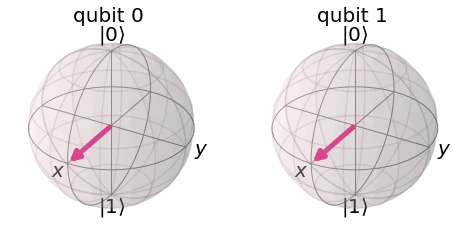

In [45]:
plot_bloch_multivector(final_state)

### The entangled state of quantum bits

In [46]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw()

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘

In [47]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

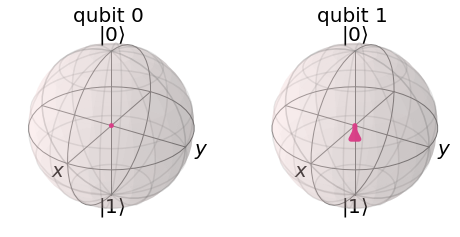

In [48]:
plot_bloch_multivector(final_state)